# Overview

The dataset contains 7043 rows (which corresponds to 7043 different customers) and 21 columns. Link of the dataset:https://www.kaggle.com/blastchar/telco-customer-churn.

Each row represents a customer and each column contains customer’s attributes. The data set contains information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

Meaning of each columns:
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* MultipleLines: Whether the customer has dependents or not (Yes, No)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

## Imports

In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [122]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df.shape

(7043, 21)

In [124]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis

Exploring the dependent variable called Churn. The variable contains information about whether or not the customer left the company within the last month.

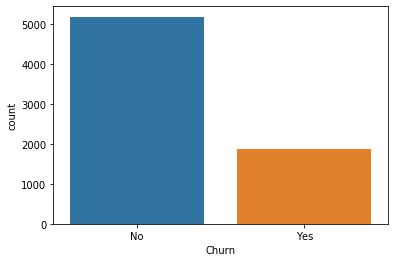

In [127]:
sns.countplot(x=df.Churn)

In [128]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

By checking this, I wanted to explore whether or not we were in the case of an imbalance dataset. Clearly this is not the case here (64%-36%).


## Exploring numerical variables

In [129]:
num_var=['tenure','MonthlyCharges','TotalCharges']

Let us change the type of the column TotalCharges from string to float.

In [130]:
df.TotalCharges=df.TotalCharges.apply(lambda x: x.replace(' ','0')).apply(lambda x: float(x))

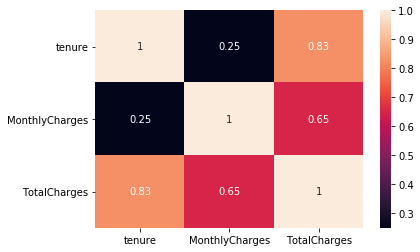

In [131]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)

MonthlyCharges and tenure seems to be positively correlated, ie the amount charged to the customer is positively correlated with the number of months the customer has stayed within the company. Also, TotalCharges is highly positively correlated with tenure, ie the total amount charged to the customers is correlated with the number of months the customer has stayed within the company. It seems obvious.

Let us explore the relaitonship between the dependent variable and the numerical variables.

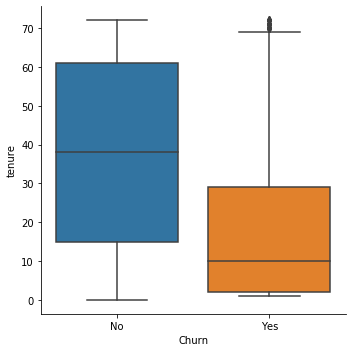

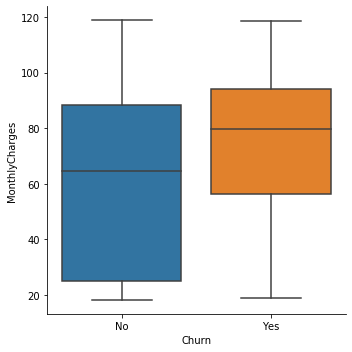

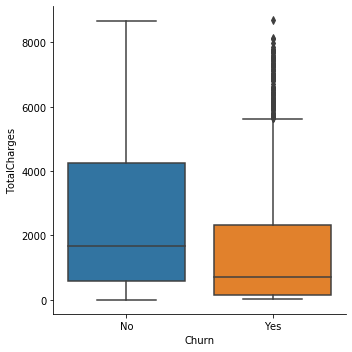

In [132]:
for num in num_var:
    sns.catplot(x='Churn',y=num,kind='box',data=df)

It seems that customers who churned have highest monthly charges.

It seems that 50% of the customers who churned stayed less than 10 months and 50% stayed more (median=10 months).

Median for customers who churned is lower than for people who did not churn. It seems normal since they stay less with the company.

#### Checking for outliers

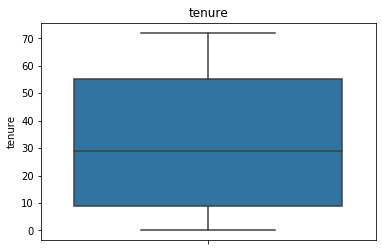

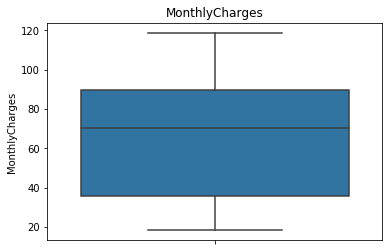

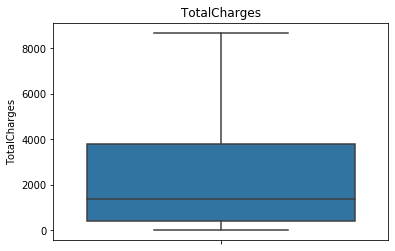

In [133]:
for numerical in num_var:
    plt.title(numerical)
    sns.boxplot(y=numerical,data=df)
    plt.show()

Based on these plot there is no outliers.

## Exploring categorical features

In [134]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Exploring the relationship between Partner, Dependents and Churn

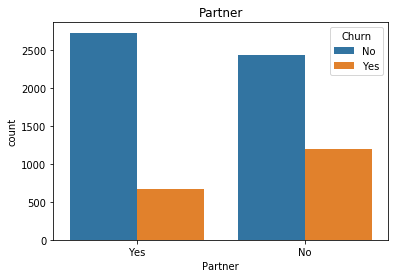

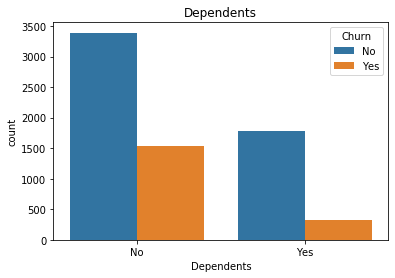

In [135]:
cat_var=['Partner','Dependents']
for cat in cat_var:
    plt.title(cat)
    sns.countplot(x=cat,data=df,hue='Churn')
    plt.show()

Churn rate is higher for people who have no Partner and nor Dependents.

#### Exploring the relationship between gender, SeniorCitizen and Churn

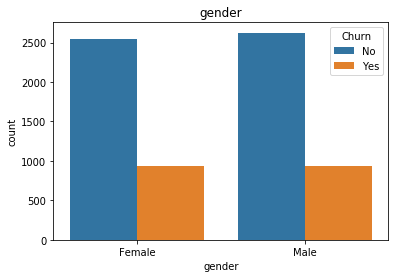

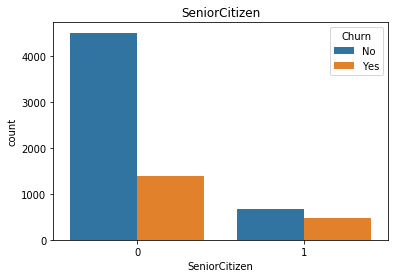

In [136]:
cat_var=['gender','SeniorCitizen']
for cat in cat_var:
    plt.title(cat)
    sns.countplot(x=cat,data=df,hue='Churn')
    plt.show()

* Churn rate is the same for Male and Female.
* Churn Rate is higher for Senior Citizen.

#### Exploring the relationship between PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies and Churn

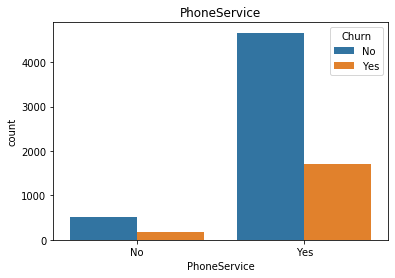

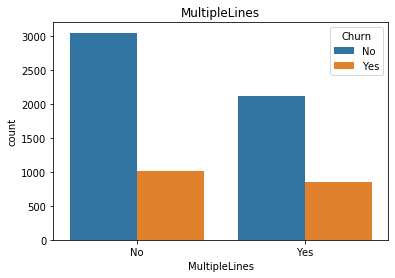

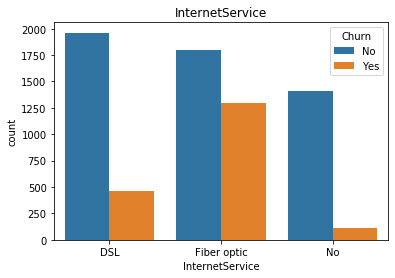

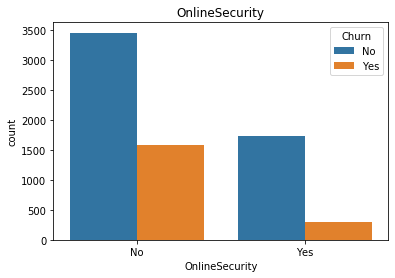

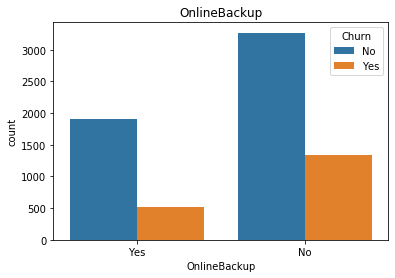

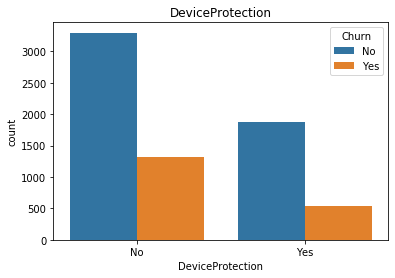

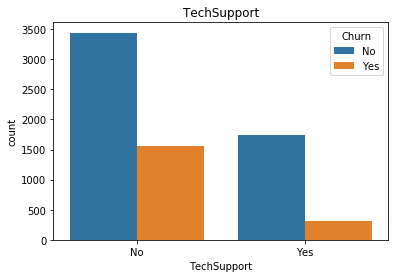

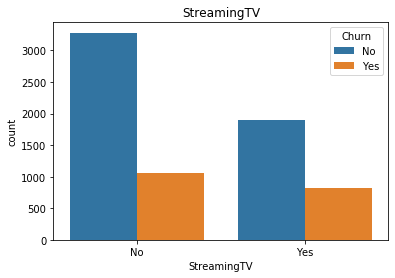

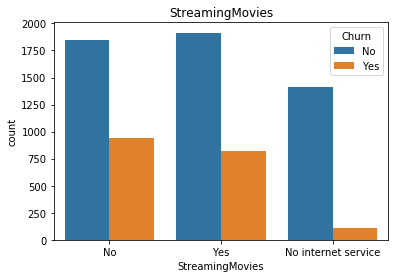

In [143]:
cat_var=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV','StreamingMovies']
for cat in cat_var:
    plt.title(cat)
    sns.countplot(x=cat,data=df,hue='Churn')
    plt.show()

Looking at these plots, it seems that we need to clean some features. Indeed, some features have 'No' and 'No internet service' or 'No phone service'. It represents the same thing. Therefore, we need to transform these features. 

In [144]:
#function to transform different columns
def No(level):
    if level=='No internet service':
        return 'No'
    elif level=='No phone service':
        return 'No'
    else:
        return level

In [145]:
#transforming the different features
for cat in cat_var:
    df[cat]=df[cat].apply(lambda x: No(x))

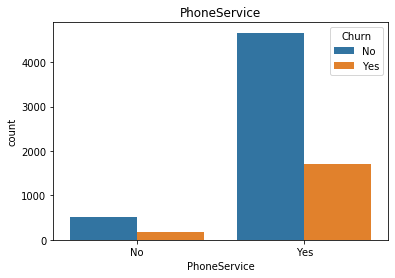

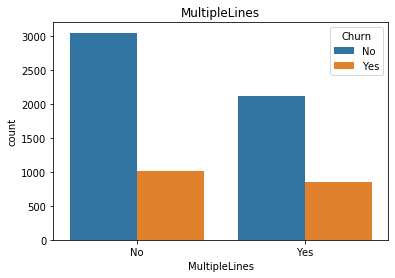

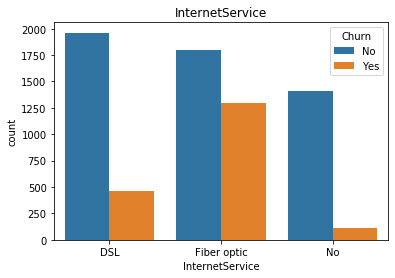

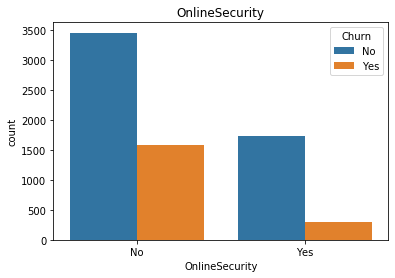

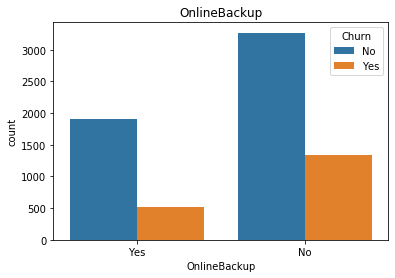

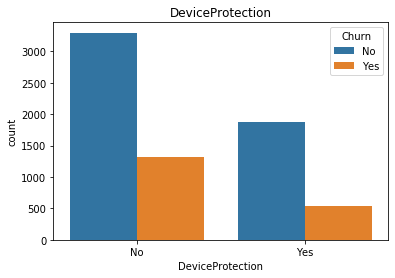

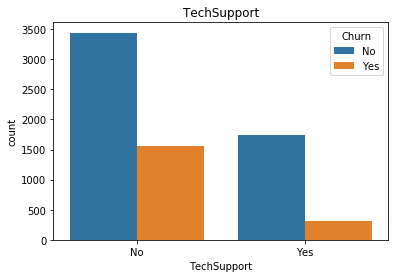

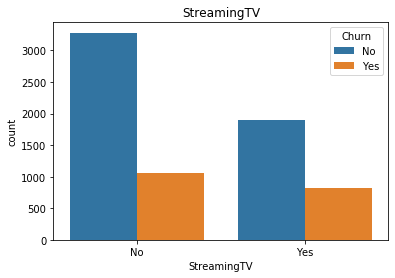

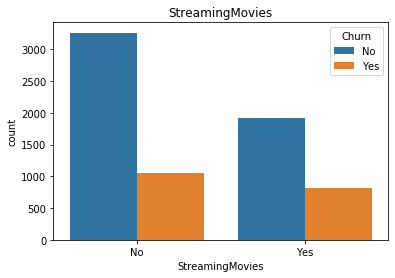

In [147]:
# do the differents visualizations again
cat_var=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV','StreamingMovies']
for cat in cat_var:
    plt.title(cat)
    sns.countplot(x=cat,data=df,hue='Churn')
    plt.show()

#### Findings

* Churn rate is the same for people with or without Phone Service, MiltipleLines and Device Protection.
* Churn rate is way more higher for people who have Fiber optic for their internet Service.
* Churn rate is higher for people who does not have an Online Security or an Online Backup.
* Churn rate is higherfor people whithout a Tech Support.

#### Exploring the relationship between 'Contract', 'PaperlessBilling', 'PaymentMethod'  and Churn

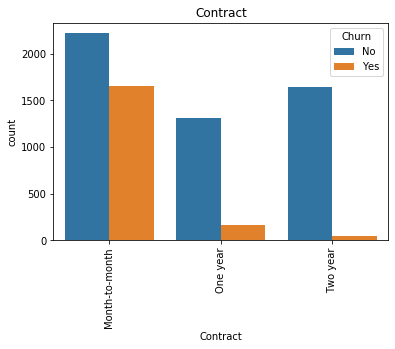

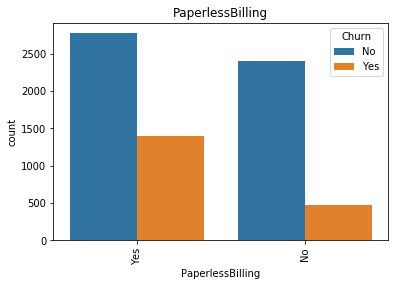

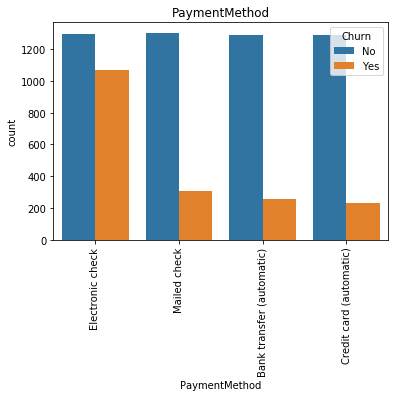

In [149]:
cat_var=['Contract', 'PaperlessBilling', 'PaymentMethod']
for cat in cat_var:
    plt.xticks(rotation=90)
    plt.title(cat)
    sns.countplot(x=cat,data=df,hue='Churn')
    plt.show()

* Churn rate is higher for the Payment Method with Electronic check.
* Churn rate is higher for people with Paperless Billing.
* Churn rate is higher for Month-to-Month contract.

### Saving the new dataframe

In [ ]:
df.to_csv('churn.csv')